In [1]:
r
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from scipy.cluster import hierarchy
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import os

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [15]:
# simple test
s = "Same here I've been there isn't there"
[w.lower() for w in word_tokenize(s)]

# ps = PorterStemmer()
# ps.stem('producing')

['same', 'here', 'i', "'ve", 'been', 'there', 'is', "n't", 'there']

In [23]:
s = ['an apple a day keeps the doctor away', 'a banana a day helps reduce risks']
tfidf_t = TfidfVectorizer(ngram_range=(2,2))
tfidf_t.fit(s)
print(tfidf_t.vocabulary_)
print(tfidf_t.idf_)

{'an apple': 0, 'apple day': 1, 'day keeps': 4, 'keeps the': 7, 'the doctor': 9, 'doctor away': 5, 'banana day': 2, 'day helps': 3, 'helps reduce': 6, 'reduce risks': 8}
[1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511]


In [164]:
s = 'They wanted to be ? a better rocks.'
t = tokenize(s)
print(t)

['they', 'wanted', 'to', 'be', 'a', 'better', 'rock']


In [178]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

from nltk.stem.snowball import SnowballStemmer
ss=SnowballStemmer("english", ignore_stopwords=True)

print(ps.stem('having'))
print(ss.stem('having'))
print(ps.stem('learned'))
print(ss.stem('learned'))
print('ss', ss.stem('whenever'))
print('ss', ss.stem('sometimes'))
print(ss.stem('was'))
print(ps.stem('were'))

have
having
learn
learn
was
were


In [162]:
# import these modules 
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
  
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
  
# a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


**TFIDF**

In [2]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

ss=SnowballStemmer("english", ignore_stopwords=True)

def tokenize(raw):
    words = [w.lower() for w in word_tokenize(raw) if w.isalpha()]
    return [ss.stem(w) for w in words]

In [3]:
root = '../texts/'
token_dict = dict()
name_list = []
for file in os.listdir(root):
    if file.endswith('.txt'):
        txt = os.path.join(root, file)
        title = file.lower()[:-4]
        with open(txt) as f:
            raw = f.read()
            token_dict[title] = raw
print(type(token_dict.values()), len(token_dict))
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words="english", ngram_range=(1,2), max_features=100000)
transformed_corpus = tfidf.fit_transform(token_dict.values())

<class 'dict_values'> 24


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
len(tfidf.stop_words_)

1662815

In [4]:
titles = list(token_dict.keys())
print(titles)

['the historical annals or cobwbxixus tacitus', 'the history op tuk decline and fall of the roman empire', 'greek and roman geography', 'the histories caius cobnelius tacitus', 'the works of joseph us', 'the history of rome 4', 'the history decline and fall roman empire', 'the history of rome 3', "titus livius' roman", 'the history of rome 2', 'the history of rome 1', 'the history of the decline and fall of the roman empire 3', 'the history of the decline and fall of the roman empire 2', 'the history of the decline and fall of the roman empire 1', 'the history of the peloponnesian war 2', 'the history of the peloponnesian war 1', 'the natural history of pliny', 'the description of greece', 'the whole genuine works of flavius josephus', 'the works of cornelius tacitus 1', 'the works of flavius josephus', 'the history of the roman empire', 'the works of cornelius tacitus 2', 'the flavius josephu']


In [5]:
print(transformed_corpus.shape)

(24, 100000)


**cosine similarity**

In [110]:
# from sklearn.metrics import pairwise_distances
# D = pairwise_distances(transformed_corpus, metric='cosine')
# print(D.shape)
# print(D[:2])

In [113]:
corpus_sim = cosine_similarity(transformed_corpus)
print(corpus_sim.shape)
print(corpus_sim[:2])

(24, 24)
[[1.         0.4414753  0.2908888  0.11234519 0.45946615 0.56258634
  0.38214491 0.57593308 0.58726626 0.51853624 0.26896741 0.56515729
  0.51809049 0.48612489 0.35917072 0.4678411  0.27511302 0.24262856
  0.43206025 0.59543397 0.47673685 0.42751113 0.56407833 0.45819559]
 [0.4414753  1.         0.381122   0.12762511 0.416386   0.38884482
  0.88708518 0.40096299 0.40919881 0.41796274 0.18972598 0.66060526
  0.62215256 0.79430959 0.27358132 0.35466028 0.28582093 0.2978994
  0.35199127 0.37969372 0.34989623 0.84467505 0.37913429 0.39488837]]


In [17]:
import pickle

with open('transformed_tfidf', 'wb') as f:
    pickle.dump(transformed_corpus, f)

**KMeans**

In [81]:
# km = KMeans(n_clusters=6).fit(transformed_corpus.toarray())
# classes = km.predict(transformed_corpus)
# print(classes)

[1 5 0 4 3 2 5 2 2 2 2 1 1 5 2 2 1 0 3 1 3 5 1 3]


In [12]:
km.cluster_centers_.shape

(6, 24)

In [31]:
import matplotlib.cm as cm
import numpy as np

**PCA**

[1 0 5 2 3 1 0 1 1 1 1 0 0 0 1 1 4 5 3 1 3 0 1 3]
(24, 2)


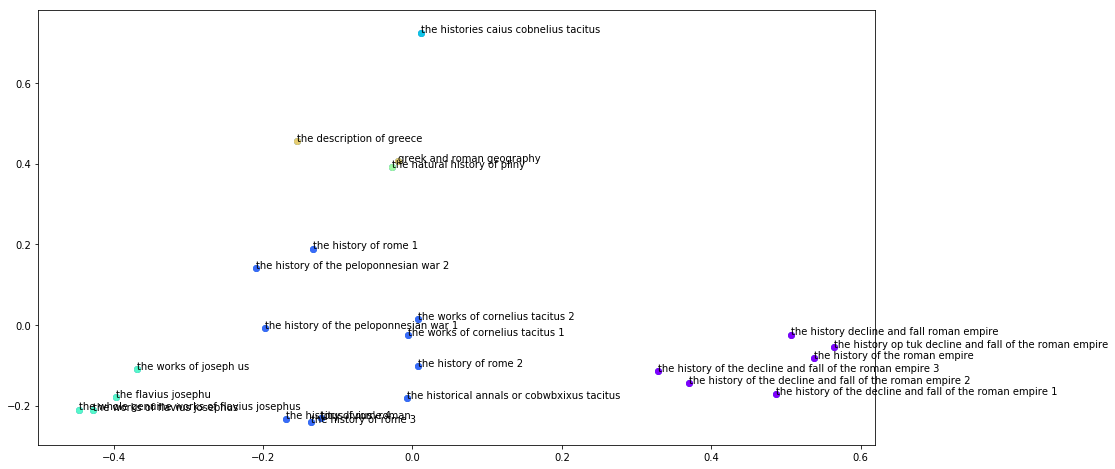

In [124]:
from sklearn.decomposition import PCA

km = KMeans(n_clusters=6).fit(transformed_corpus.toarray())
classes = km.predict(transformed_corpus.toarray())
print(classes)

pca = PCA(n_components=2).fit_transform(transformed_corpus.toarray())
print(pca.shape)

colors = cm.rainbow(np.linspace(0, 0.7, len(set(classes))))

plt.figure(figsize=[15, 8])
plt.scatter(pca[:,0], pca[:,1])
for i, txt in enumerate(titles):
    plt.scatter(pca[i,0], pca[i,1], color=colors[classes[i]])
    plt.annotate(txt, (pca[i,0], pca[i,1]))

In [93]:
# from sklearn.decomposition import PCA

# km = KMeans(n_clusters=6).fit(corpus_sim)
# classes = km.predict(corpus_sim)
# print(classes)

# pca = PCA(n_components=2).fit_transform(corpus_sim)
# print(pca.shape)

# colors = cm.rainbow(np.linspace(0, 0.7, len(set(classes))))

# plt.figure(figsize=[15, 8])
# plt.scatter(pca[:,0], pca[:,1])
# for i, txt in enumerate(titles):
#     plt.scatter(pca[i,0], pca[i,1], color=colors[classes[i]])
#     plt.annotate(txt, (pca[i,0], pca[i,1]))

**MDS**

[1 0 5 2 3 1 0 1 1 1 1 0 0 0 4 4 0 5 3 1 3 0 1 3]
(24, 24)


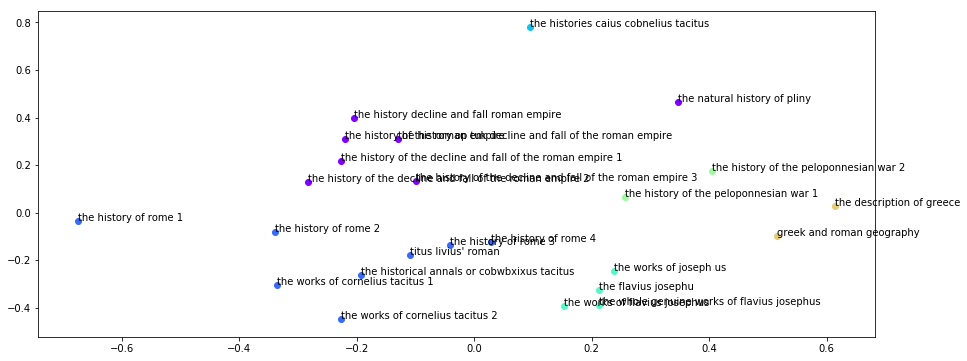

In [135]:
from sklearn.metrics import pairwise_distances

km = KMeans(n_clusters=6).fit(transformed_corpus)
classes = km.predict(transformed_corpus)
print(classes)


D = pairwise_distances(transformed_corpus, metric='cosine')   # default: euclidean distance
print(D.shape)
mds = MDS(n_components=2, random_state=2019, dissimilarity='precomputed').fit_transform(D)
# mds = MDS(n_components=2, random_state=2019).fit_transform(corpus_sim)

plt.figure(figsize=[15, 6])
for i, txt in enumerate(titles):
    plt.scatter(mds[i,0], mds[i,1], color=colors[classes[i]])
    plt.annotate(txt, (mds[i,0], mds[i,1]))

In [121]:
D[:2]

array([[0.        , 0.5585247 , 0.7091112 , 0.88765481, 0.54053385,
        0.43741366, 0.61785509, 0.42406692, 0.41273374, 0.48146376,
        0.73103259, 0.43484271, 0.48190951, 0.51387511, 0.64082928,
        0.5321589 , 0.72488698, 0.75737144, 0.56793975, 0.40456603,
        0.52326315, 0.57248887, 0.43592167, 0.54180441],
       [0.5585247 , 0.        , 0.618878  , 0.87237489, 0.583614  ,
        0.61115518, 0.11291482, 0.59903701, 0.59080119, 0.58203726,
        0.81027402, 0.33939474, 0.37784744, 0.20569041, 0.72641868,
        0.64533972, 0.71417907, 0.7021006 , 0.64800873, 0.62030628,
        0.65010377, 0.15532495, 0.62086571, 0.60511163]])

In [123]:
# from sklearn.metrics import pairwise_distances

# km = KMeans(n_clusters=6).fit(corpus_sim)
# classes = km.predict(corpus_sim)
# print(classes)

# D = pairwise_distances(corpus_sim)   # default: euclidean distance
# mds = MDS(n_components=2, random_state=2019, dissimilarity='precomputed').fit_transform(D)
# # mds = MDS(n_components=2, random_state=2019).fit_transform(corpus_sim)

# plt.figure(figsize=[15, 6])
# for i, txt in enumerate(titles):
#     plt.scatter(mds[i,0], mds[i,1], color=colors[classes[i]])
#     plt.annotate(txt, (mds[i,0], mds[i,1]))

In [99]:
mds.shape

(24, 2)

In [85]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
X, _ = load_digits(return_X_y=True)
X.shape

embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

(100, 2)

In [89]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**Hierarchical clustering**

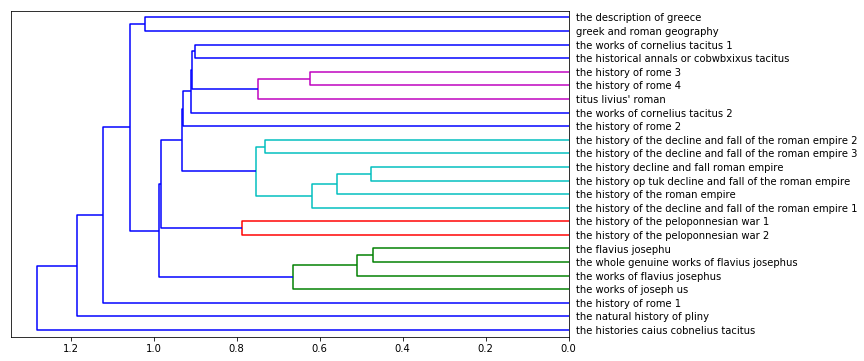

In [42]:
Z = hierarchy.linkage(transformed_corpus.toarray(), 'single')
plt.figure(figsize=[10,6])
dn = hierarchy.dendrogram(Z, labels=titles, orientation='left')

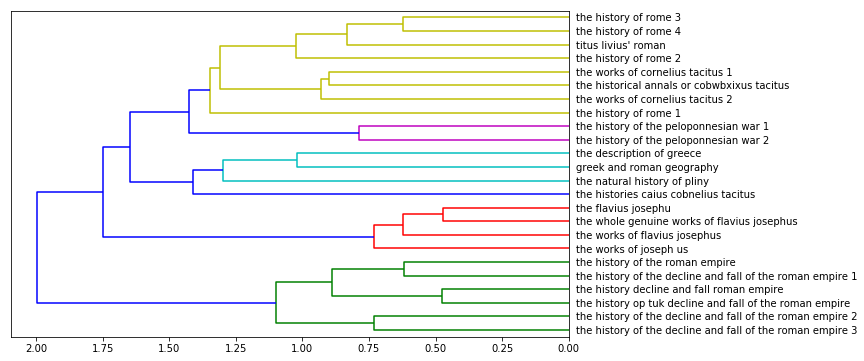

In [46]:
Z = hierarchy.linkage(transformed_corpus.toarray(), 'ward')
plt.figure(figsize=[10,6])
dn = hierarchy.dendrogram(Z, labels=titles, orientation='left')

**Word2Vector**

In [170]:
# from gensim.models import KeyedVectors
# filename = 'GoogleNews-vectors-negative300.bin'
# model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
# result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
# print(result)

In [47]:
# transformed_corpus.shape

(24, 100000)

In [47]:
from gensim.models import Word2Vec

def tokenize(raw):
    return [w.lower() for w in word_tokenize(raw) if w.isalpha()]

documents = []
for file in os.listdir(root):
    if file.endswith('.txt'):
        txt = os.path.join(root, file)
        title = file.lower()[:-4]
        with open(txt) as f:
            raw = f.read()
            documents.append(tokenize(raw))
print(len(documents))

24


In [48]:
print(len(documents[0]))

69035


In [52]:
model = Word2Vec(sentences=documents, size=300, window=5, min_count=5, workers=4, sg=0)

In [53]:
model.wv.most_similar('roman')

[('circus', 0.9986690282821655),
 ('irruption', 0.9985164403915405),
 ('eagles', 0.9984305500984192),
 ('antonines', 0.9983811378479004),
 ('inroads', 0.9983254671096802),
 ('cannae', 0.9981937408447266),
 ('empire', 0.9981806874275208),
 ('equestrian', 0.9976434111595154),
 ('embassies', 0.9974600672721863),
 ('side', 0.9971486330032349)]

In [54]:
model.wv.most_similar('empire')

[('east', 0.9992648959159851),
 ('banks', 0.9990787506103516),
 ('circus', 0.9988316893577576),
 ('administration', 0.9988206624984741),
 ('goddess', 0.9987874031066895),
 ('goths', 0.998751163482666),
 ('west', 0.9986735582351685),
 ('punic', 0.9986023902893066),
 ('emperor', 0.9985999464988708),
 ('july', 0.9985793828964233)]

In [56]:
model.wv['empire'].shape

(300,)

In [102]:
test_vec = [model[i] for i in documents[0] if i in model]
test_vec = np.array(test_vec)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [103]:
test_vec.shape

(68130, 300)

In [106]:
t_test = np.mean(test_vec, axis=0)
print(t_test.shape)
print(type(t_test.tolist()))
print(t_test[0:10])

(300,)
<class 'list'>
[ 0.09979109 -0.24183583 -0.24899225 -0.31527883  0.33619255 -0.1578495
  0.10758054 -0.87318194  0.26217043 -0.02722581]


In [108]:
np.mean([[1,2,3], [4,4,5]], axis=0)

array([2.5, 3. , 4. ])

In [57]:
documents_vec = []
for d in documents:
    vec = np.array([model.wv[i] for i in d if i in model.wv])
    vec = np.mean(vec, axis=0)
    documents_vec.append(vec.tolist())
documents_vec = np.array(documents_vec)
print(documents_vec.shape)

(24, 300)


In [110]:
documents_vec[0].shape

(300,)

In [59]:
vec_sim = cosine_similarity(documents_vec)
print(vec_sim.shape)

(24, 24)


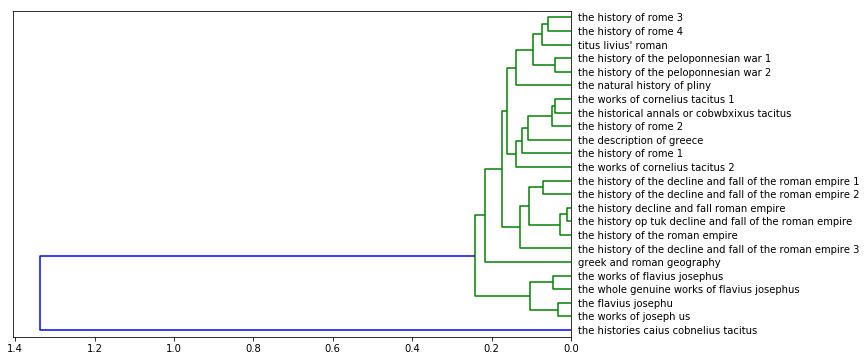

In [64]:
Z = hierarchy.linkage(documents_vec, 'single')
plt.figure(figsize=[10,6])
dn = hierarchy.dendrogram(Z, labels=titles, orientation='left')

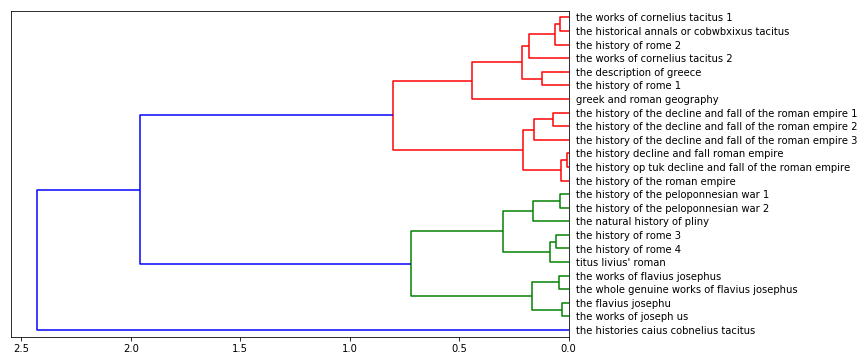

In [65]:
# mincount = 5
Z = hierarchy.linkage(documents_vec, 'ward')
plt.figure(figsize=[10,6])
dn = hierarchy.dendrogram(Z, labels=titles, orientation='left')

In [142]:
# km = KMeans(n_clusters=6).fit(vec_sim)
# classes = km.predict(vec_sim)
# print(classes)

# colors = cm.rainbow(np.linspace(0, 0.7, len(set(classes))))
# print(colors.shape)
# mds = MDS(n_components=2, random_state=2019).fit_transform(vec_sim)

# plt.figure(figsize=[15, 5])

# for i, txt in enumerate(titles):
#     plt.scatter(mds[i,0], mds[i,1], color=colors[classes[i]])
#     plt.annotate(txt, (mds[i,0], mds[i,1]))

In [112]:
# km = KMeans(n_clusters=6).fit(documents_vec)
# classes = km.predict(documents_vec)
# print(classes)

# colors = cm.rainbow(np.linspace(0, 0.7, len(set(classes))))
# print(colors.shape)
# mds = MDS(n_components=2, random_state=2019).fit_transform(documents_vec)

# plt.figure(figsize=[15, 8])
# # plt.yticks(np.arange(-0.6, 1.6, 0.2))

# for i, txt in enumerate(titles):
#     plt.scatter(mds[i,0], mds[i,1], color=colors[classes[i]])
#     plt.annotate(txt, (mds[i,0], mds[i,1]))

[5 2 1 3 4 0 2 0 0 5 5 2 2 2 0 0 0 5 4 5 4 2 5 4]


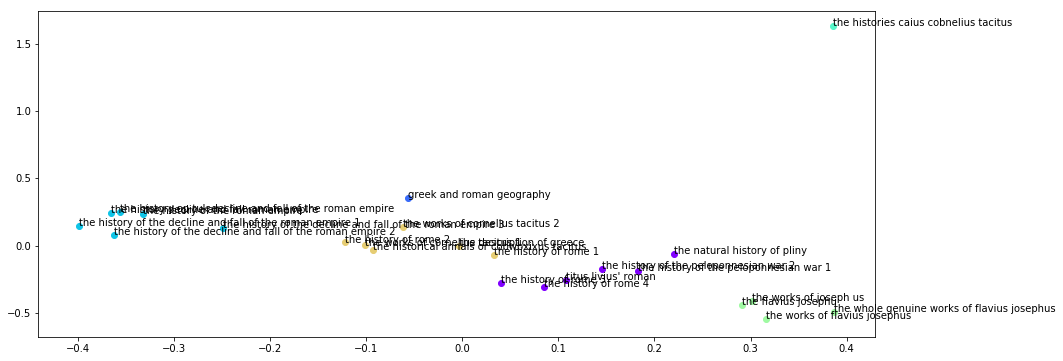

In [140]:
from sklearn.metrics import pairwise_distances

km = KMeans(n_clusters=6).fit(documents_vec)
classes = km.predict(documents_vec)
print(classes)
colors = cm.rainbow(np.linspace(0, 0.7, len(set(classes))))

D = pairwise_distances(documents_vec, metric='euclidean')   # default: euclidean distance
mds = MDS(n_components=2, random_state=2019, dissimilarity='precomputed').fit_transform(D)
# mds = MDS(n_components=2, random_state=2019).fit_transform(corpus_sim)

plt.figure(figsize=[15, 6])
for i, txt in enumerate(titles):
    plt.scatter(mds[i,0], mds[i,1], color=colors[classes[i]])
    plt.annotate(txt, (mds[i,0], mds[i,1]))

**PCA**

[3 4 1 2 0 5 4 5 5 3 3 4 4 4 5 5 5 3 0 3 0 4 3 0]
(24, 2)


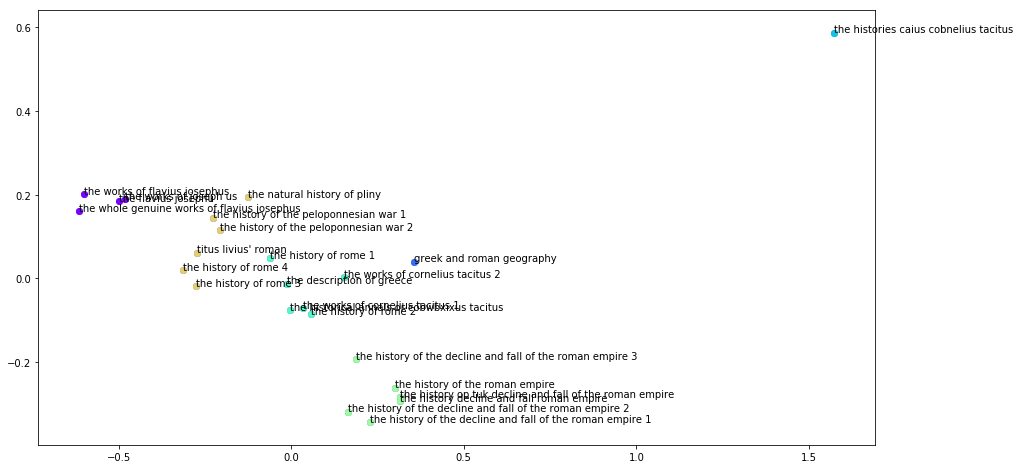

In [128]:
from sklearn.decomposition import PCA

km = KMeans(n_clusters=6).fit(documents_vec)
classes = km.predict(documents_vec)
print(classes)

pca = PCA(n_components=2).fit_transform(documents_vec)
print(pca.shape)

colors = cm.rainbow(np.linspace(0, 0.7, len(set(classes))))

plt.figure(figsize=[15, 8])
plt.scatter(pca[:,0], pca[:,1])
for i, txt in enumerate(titles):
    plt.scatter(pca[i,0], pca[i,1], color=colors[classes[i]])
    plt.annotate(txt, (pca[i,0], pca[i,1]))

**to do**
- [ ] tfidf: stem, lem
- [ ] change the axis range of scatter
- [ ] remove the figure that didn't use the features after computing cosine